In [1]:
import numpy as np
import pandas as pd
from deepneuralnet import *
import deepneuralnet_train as dnntrain

In [2]:
# Set up hyper parameters 
c = 1
layer_dims = [10, c] 
learning_rate = 0.001
keep_prob = 1.0
num_epochs = 100
minibatch_size = 2000
print_summary = False
isBinary = c <= 2 
hyperparams = DNN.create_hyperparameter_bundle(layer_dims, learning_rate, num_epochs, keep_prob, minibatch_size)
print(hyperparams)

{'layer_dims': [10, 1], 'keep_prob': 1.0, 'learning_rate': 0.001, 'num_epochs': 100, 'minibatch_size': 2000}


In [3]:
# Generate data
m = 10000
n_x = 100
label = 'Survived'
x_data = np.random.rand(m, n_x)
y_test = None

if isBinary:
    y_test = np.random.randint(2, size=(1, m))[0]
else:
    y_test = np.random.randint(c, size=(1, m))[0]

df = pd.DataFrame(x_data)
df[label] = y_test
df = df.astype('float32')
classification = len(set(y_test))
print(classification)

2


train_x.shape: (100, 7000)
train_y.shape: (1, 7000)
dev_x.shape: (100, 3000)
dev_y.shape: (1, 3000)
Binary classification neural network with hyperparameters:
layer_dims: [10, 1] dropoutKeepProb: 1.0 learning_rate: 0.001 num_epochs: 100 minibatch_size: 2000
Training underway...
Cost after epoch 0: 1.029324
Cost after epoch 20: 0.934210
Cost after epoch 40: 0.927367
Cost after epoch 60: 0.920346
Cost after epoch 80: 0.912367


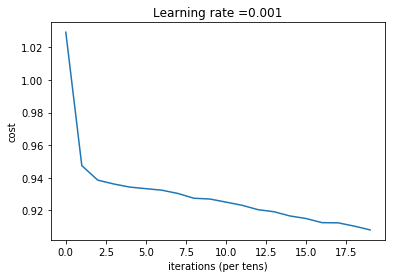

train_accuracy : 0.553857
test_accuracy : 0.487333
precision : 0.492209631728
recall : 0.458443271768
f1score : 0.474726775956
Done training!



In [4]:
# Example of using dnn.train_with_hyperparameter_bundle
nn = DNN(hyperparams)
model = nn.split_data_and_train(df, label, split_percent=0.7)
# parameters = model[dnn.KEY_PARAMETERS]

In [5]:
# Example of using kfold to determine best hyper parameters
hyperparams1 = DNN.create_hyperparameter_bundle(layer_dims = [c], learning_rate = 0.01, num_epochs = 500, keep_prob = 1.0)
hyperparams2 = DNN.create_hyperparameter_bundle(layer_dims = [5,c], learning_rate = 0.001, num_epochs = 500, keep_prob = 0.75)

result1 =  dnntrain.kfold(df, label, hyperparams1, k = 2, print_summary = True)
avg_accuracy1 = result1[dnn.KEY_AVERAGE_ACCURACY]
# result2 = dnntrain.kfold(df, label, hyperparams2, k = 2, print_summary = True)
# avg_accuracy2 = result2[dnn.KEY_AVERAGE_ACCURACY]

print("avg_accuracy1 " + str(avg_accuracy1))
print("avg_accuracy2 " + str(avg_accuracy2))

Starting K FOLD
Training fold 1 / 2


KeyboardInterrupt: 

In [ ]:
p = result1[DNN.KEY_BEST_MODEL][DNN.KEY_PARAMETERS]